In [16]:
import pandas as pd 
import numpy as np
from scipy.stats import norm
from scipy.misc import imread
import re
# from PyPDF2 import PdfFileReader
import pickle
import sys
from copy import copy
import os
from datetime import datetime 
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
fpath = "../../egypt/EgyptianHieroglyphDataset/LanguageModel/Lexicon.txt"

In [53]:
lexicon_all = pd.read_csv(fpath, sep = ";", header = None)
del lexicon_all[4]
lexicon_all.columns = ["symbol", "phonetic", "translation", "freq"]
lexicon_all["symbol"] = lexicon_all["symbol"].str.strip(",")
lexicon_all.tail(3)

,symbol,phonetic,translation,freq
11724,"Z9,N35,W24,G43",Sbnw,various,0.00
11725,"Z9,N35",Sbnw,various,0.25
11726,"Z9,N35,W24,Y1,Z2",Sbnw,various,0.00


In [55]:
single_word = lexicon_all["symbol"].map(lambda x: re.match(r"^[^,]*,.+$", x) == None)
lexicon = lexicon_all[single_word].copy()
lexicon.sort_values("freq", inplace = True, ascending = False)
lexicon.tail(3)

,symbol,phonetic,translation,freq
9220,S7,xprS,the Blue Crown,0.0
99,A6,wab,"pure, purify oneself, bathe, cleanse, purifica...",0.0
6626,O17,tAyty,the shrouded one (of Osiris),0.0


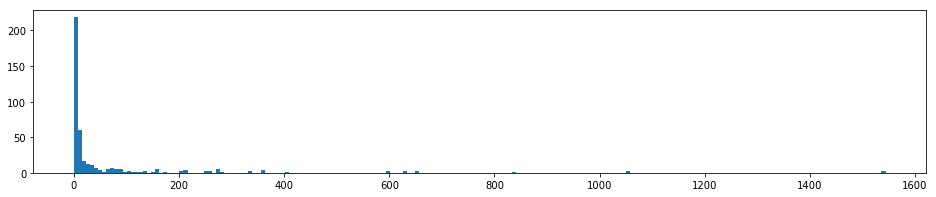

In [60]:
plt.figure(figsize = (16, 3))
plt.hist(lexicon["freq"], bins = 200)
plt.show()

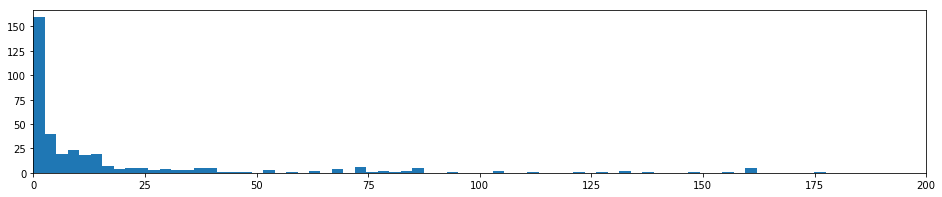

In [63]:
plt.figure(figsize = (16, 3))
plt.hist(lexicon["freq"], bins = 600)
plt.xlim([0, 200])
plt.show()

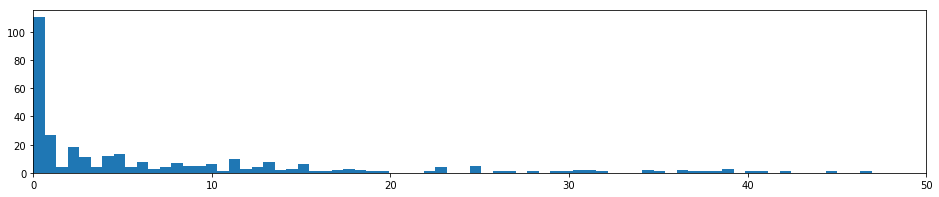

In [65]:
plt.figure(figsize = (16, 3))
plt.hist(lexicon["freq"], bins = 2400)
plt.xlim([0, 50])
plt.show()

In [66]:
# TODO refine this
lexicon.loc[600 <= lexicon["freq"], "freq_cat"] = "Very common"
lexicon.loc[(200 <= lexicon["freq"]) & (lexicon["freq"] < 600), "freq_cat"] = "Common"
lexicon.loc[(15 <= lexicon["freq"]) & (lexicon["freq"] < 200), "freq_cat"] = "Moderate"
lexicon.loc[lexicon["freq"] < 15, "freq_cat"] = "Rare"

In [68]:
lexicon["freq_cat"].value_counts()

Rare           272
Moderate        97
Common          26
Very common     10
Name: freq_cat, dtype: int64

### pickle translation

In [70]:
lexicon.tail(5)

,symbol,phonetic,translation,freq,freq_cat
9222,S95,wDA,pectoral,0.0,Rare
9221,S8,Atfw,Atef crown,0.0,Rare
9220,S7,xprS,the Blue Crown,0.0,Rare
99,A6,wab,"pure, purify oneself, bathe, cleanse, purifica...",0.0,Rare
6626,O17,tAyty,the shrouded one (of Osiris),0.0,Rare


In [71]:
lexicon.shape

(405, 5)

In [69]:
with open("../models/translate.h5", "wb") as picklefile:
    pickle.dump(lexicon, picklefile)